In [3]:
%matplotlib inline

In [79]:
import statsmodels.api as sm
import statsmodels
from sklearn import datasets
from statsmodels.regression.linear_model import OLS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import widgets


In [80]:
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])
target_norm = (target - target.mean())/target.std()
df_norm = (df - df.mean())/df.std()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [82]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [83]:
target_norm.head()

,MEDV
0,0.159528
1,-0.101424
2,1.322937
3,1.181589
4,1.486032


In [84]:
X = df_norm#['RM']
X = sm.add_constant(X)
y = target_norm["MEDV"]
type(y)

pandas.core.series.Series

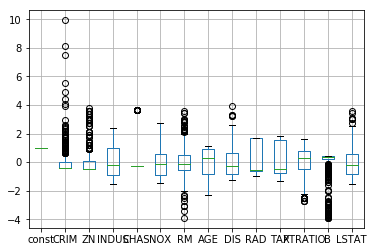

In [85]:
X.boxplot()

In [86]:
y.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

In [87]:
X.describe()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,1.0,-2.808469e-17,6.319056e-17,-3.145486e-15,-7.021173e-17,2.611876e-15,-1.148313e-14,-1.200621e-15,7.161597e-16,1.123388e-16,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-4.173004e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,1.0,-4.084919e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,1.0,-3.881976e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,1.0,6.242078e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,1.0,9.931906e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [88]:
X.corr()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,NaN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,NaN,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,NaN,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,NaN,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,NaN,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,NaN,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,NaN,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,NaN,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [89]:

# Note the difference in argument order
model = OLS(y, X).fit()
#result = model.fit_regularized(alpha=5)
# model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
#model.summary()
model.params
#model.fittedvalues.plot()
#y.plot()

const      2.966377e-16
CRIM      -1.001752e-01
ZN         1.176512e-01
INDUS      1.556018e-02
CHAS       7.424930e-02
NOX       -2.242153e-01
RM         2.906659e-01
AGE        2.298716e-03
DIS       -3.378803e-01
RAD        2.893756e-01
TAX       -2.259355e-01
PTRATIO   -2.244398e-01
B          9.323458e-02
LSTAT     -4.079969e-01
dtype: float64

In [103]:
model2 = OLS(y, X)
def paramteric_reg(alpha):
    #out = model2.copy()
    res = model2.fit_regularized(alpha=alpha)
    print(res.params)
    plt.plot(res.params)
out = widgets.interact(paramteric_reg, alpha=(0.0,0.5,0.01))

#model2.fittedvalues.plot()
#y.plot()

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.01), Output()), _dom_classe…

In [52]:
foo = statsmodels.multivariate.pca.PCA(X)

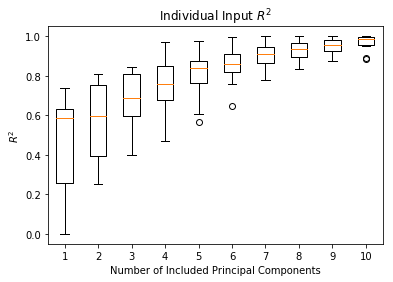

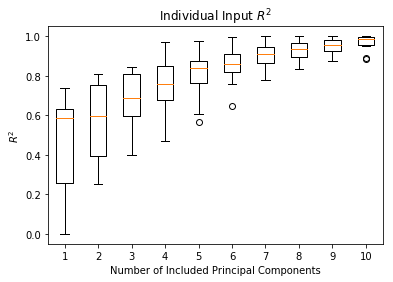

In [53]:
foo.plot_rsquare()

In [48]:
foo.coeff

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
comp_00,13.892419,-14.278040,19.306375,0.283812,19.090111,-10.544096,17.469023,-17.907823,17.801119,18.843164,11.411530,-11.284139,17.245819
comp_01,-8.430613,-8.649246,3.009945,12.294534,5.918294,4.142184,8.391885,-9.399540,-7.278812,-6.429816,-8.309942,6.324778,-2.045357
comp_02,6.191270,7.482000,-0.401949,7.179968,2.996565,14.858421,-0.500796,-1.185922,7.283716,5.612867,-8.029680,-7.538514,-6.688183
comp_03,-1.383880,-2.679741,-0.346406,-16.999828,2.669364,5.871120,3.635333,-4.476210,-2.728885,-2.123953,-5.844218,-3.568837,-1.462482
comp_04,1.643730,6.619028,-0.147706,1.740408,2.827410,-8.681127,0.339810,2.027296,-4.166277,-2.647267,-12.017520,-7.124770,8.099114
comp_05,-4.530171,-5.694151,-1.236205,3.061497,-2.689189,1.052939,-1.367058,0.518281,-2.473399,-3.305062,5.013494,-14.708854,-0.965345
comp_06,12.776012,-4.748853,-5.558923,1.262473,-3.358226,1.036761,1.806177,-1.734898,-2.388430,-5.295490,0.097836,0.632274,1.299403
comp_07,-2.058902,5.660781,-2.553398,0.359356,-1.160161,4.634194,8.521513,1.710149,-1.117732,-1.201633,4.478946,0.131839,6.048532
comp_08,3.025808,4.270220,7.642885,-0.165905,-0.220162,0.567126,-0.744379,-1.790378,-5.581467,-2.076229,3.032275,-0.583490,-2.328575
comp_09,-0.183422,-2.810682,3.848272,0.065948,-2.445909,4.554374,-3.843730,1.780910,-0.243726,0.360301,-1.612594,1.022336,6.340252
